<a href="https://colab.research.google.com/github/AlexBaunti/Prediction_AI/blob/main/NearestNeighborsMethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Метод k-ближайших соседей**

# Инициализация библиотек

Подключение необходимых для работы библиотек.




Для работы необходимо подключить библиотеки:


*   numPy
*   pandas
*   MissingNo
*   SeaBorn
*   MatplotLIB
*   Warnings



In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np # обращение сокращенно np
import pandas as pd # обращение сокращенно pd
import missingno as msno # обращение сокращенно msno
import seaborn as sns # обращение сокращенно sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt # обращение сокращенно plt
%matplotlib inline
from sklearn import linear_model, ensemble # алгоритмы sklearn
from sklearn import preprocessing  # модуль для кодирования
from sklearn.neural_network import MLPClassifier   # импорт алгоритма для построения простейшей нейронной сети
from sklearn.metrics import make_scorer   # метод, полезный для получения оценок модели при использовании кросс-валидации
from sklearn.metrics import accuracy_score   # метрика общей точности
from sklearn.model_selection import cross_validate   # метод, необходмый для проведения кросс-валидации
from sklearn.model_selection import StratifiedKFold   # алгоритм кросс-валидации
from sklearn.metrics import mean_absolute_error, mean_squared_error # меры качества

# Загрузка данных

Получение файлов с данными из GitHub репозитория. 

Получение файлов с данными по ссылке на репозиторий. Данные для обучения и теста передаются в соответствующие переменные. Для чтения Excel-таблиц используется команда "read_excel".  

In [ ]:
%%capture
!wget https://raw.githubusercontent.com/AlexBaunti/Prediction_AI/main/COVID_Test_Data.xlsx
!wget https://raw.githubusercontent.com/AlexBaunti/Prediction_AI/main/COVID_Training_Data.xlsx
training_data = pd.read_excel('COVID_Training_Data.xlsx')
test_data = pd.read_excel('COVID_Test_Data.xlsx')

Проверка данных - первые 5 строк таблицы с тренировочными данными

In [ ]:
training_data.head()

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,вчСРБ,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо,Class15
0,0,54,2,151,58,25.437481,1.559736,0,0,0,1,2,30,2,0,0,0,2,0,1,2,0,0,0,0,35,35,2,96,145,90,65,110,107,97,70,20.0,20,19,145,4.5,9.40,32,5,27,0,53.0,10.0,0.641304,1.88,0.455645,0.693005,1.134021,46.444954,0.211111,9.354839,РСА,в,4.25,5.35,4.70,0.80,0.88,NaN,NaN,NaN,NaN,3.92,125.0,42.0,41.0,20.0,37.6,0.87,330,120,12.0,3.500000,4.875000,3.90,2,11,300,1
1,0,63,2,165,115,42.240588,2.295830,1,0,0,1,1,60,2,0,0,0,2,0,1,2,0,0,0,0,25,27,2,97,130,80,67,100,108,79,87,50.0,37,29,134,5.0,3.90,35,3,27,0,54.6,7.4,0.464072,1.30,0.849057,0.783176,1.265823,47.987421,0.362500,6.806283,РСА,н,6.50,4.46,6.60,1.20,1.69,NaN,NaN,NaN,NaN,3.80,46.0,102.0,28.0,39.0,27.0,0.98,240,85,6.5,4.631818,4.500000,5.40,2,13,280,1
2,0,50,2,159,46,18.195483,1.425365,0,0,0,1,1,15,2,0,2,2,2,0,1,2,0,0,0,0,20,35,2,98,127,80,64,78,69,84,89,NaN,41,17,124,4.5,8.79,20,1,18,5,70.0,4.0,0.436782,13.79,0.240196,0.519617,0.928571,29.806088,0.212500,6.546392,РСА,в,6.53,3.40,5.48,0.75,3.32,NaN,NaN,NaN,NaN,2.20,90.0,69.0,24.0,13.0,36.0,1.01,248,100,40.0,3.220909,6.306667,4.73,2,12,300,1
3,0,41,2,166,92,33.386558,2.059666,1,0,0,1,2,60,2,0,2,1,2,0,1,2,0,0,0,0,25,40,2,96,135,80,60,115,120,75,87,64.0,75,78,133,4.5,12.00,18,2,5,4,70.0,6.0,0.108491,8.00,1.081250,0.827586,1.533333,38.500000,0.975000,6.081081,РТ,н,6.30,5.00,3.64,0.99,1.13,NaN,NaN,NaN,NaN,5.50,102.0,61.0,25.0,188.0,30.0,0.90,220,125,25.0,2.136364,2.676768,2.65,2,12,300,1
4,0,37,2,161,71,27.390919,1.781931,1,0,0,1,2,30,2,1,1,2,2,0,1,1,0,0,0,0,24,37,2,96,105,70,65,105,100,89,79,38.0,40,39,145,5.3,9.60,31,1,12,3,56.0,9.0,0.323308,12.60,0.735644,0.646831,1.179775,38.926002,0.557143,5.706522,РТ,н,4.30,3.60,4.70,1.00,1.69,NaN,NaN,NaN,NaN,2.70,85.0,64.0,128.0,50.0,34.0,0.96,340,177,12.0,2.931818,3.700000,3.70,2,13,300,1


Считывание размерности таблицы с тренировочными данными

In [ ]:
training_data.shape

(64, 84)

Полная таблица данных размерность 64 х 84 успешно передана.

# Анализ набора данных

Получение необходимой информации о данных.

Получим общую информацию о полном наборе данных

In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 84 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Пробиотик       64 non-null     int64  
 1   Возраст         64 non-null     int64  
 2   Пол             64 non-null     int64  
 3   Рост            64 non-null     int64  
 4   Вес             64 non-null     int64  
 5   ИМТ             64 non-null     float64
 6   ПлощадьТела     64 non-null     float64
 7   ПредраспССЗ     64 non-null     int64  
 8   Курение         64 non-null     int64  
 9   Алкоголь        64 non-null     int64  
 10  Гиподинамия     64 non-null     int64  
 11  КТ              64 non-null     int64  
 12  ДеньПослеCovid  64 non-null     int64  
 13  СлабостьДо      64 non-null     int64  
 14  БольСердцаДо    64 non-null     int64  
 15  Седцебиение     64 non-null     int64  
 16  ПеребоиДо       64 non-null     int64  
 17  ОдышкаДо        64 non-null     int64

Анализируем результата выполнения команды:

* 64 экземпляра (строки)
* 84 признака (столбцы)

Имеется всего три различных типа данных (dtypes):

* int64 - целое число - 47 столбцов;
* float64 - дробное число - 35 столбцов;
* object - объект (текст) - 2 столбца;


Выведем описательные характеристики набора данных

In [ ]:
pd.set_option('display.max_columns', None)
training_data.describe(include = [np.number])

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,вчСРБ,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо,Class15
count,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,63.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,51.000000,51.000000,34.000000,34.000000,64.000000,64.000000,64.00000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,15.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.00000,64.000000
mean,0.484375,56.921875,1.718750,167.03125,80.937500,29.035638,1.927858,0.578125,0.046875,0.062500,0.734375,1.656250,45.312500,1.968750,0.640625,0.750000,0.671875,1.875000,0.343750,0.546875,1.265625,0.125000,0.046875,0.062500,0.234375,20.656250,28.156250,1.890625,97.687500,130.734375,81.406250,73.65625,94.468750,90.546875,94.203125,85.031250,74.888889,74.859375,75.187500,141.187500,4.548438,6.607344,35.171875,3.250000,14.015625,2.968750,49.837500,8.756250,0.272991,5.001281,1.066656,0.614607,1.044505,34.747301,0.923058,5.819934,6.182969,3.550781,5.212500,1.578437,1.397656,67.394118,41.431373,34.450000,73.088235,4.965469,91.573437,67.09875,23.946875,27.595312,33.826563,1.079531,367.218750,169.328125,17.046667,3.174830,2.546198,3.634063,2.500000,12.015625,348.71875,0.578125
std,0.503706,9.292948,0.453163,7.77658,17.141683,6.057935,0.221854,0.497763,0.213042,0.243975,0.445157,0.569565,18.979417,0.533594,0.573687,0.534522,0.564975,0.701472,0.510796,0.532430,0.695614,0.333333,0.213042,0.243975,0.426956,5.839707,7.770965,0.475334,0.774084,14.600763,9.852433,11.75574,16.282203,16.945224,18.749967,20.268021,29.863189,26.150885,37.619598,12.007769,0.331419,1.933264,8.476962,2.600366,7.789884,1.613128,8.939364,2.339304,0.113415,3.726326,0.323349,0.116536,0.272303,8.212217,0.415248,1.383804,1.545402,0.720067,0.958622,0.425845,0.667156,3.556707,2.467832,39.808437,20.461890,1.298045,15.907134,14.69214,17.128533,27.548926,3.295078,0.131166,106.910208,315.460362,12.034644,0.967208,1.195598,0.926543,1.007905,2.081606,57.33900,0.497763
min,0.000000,37.000000,1.000000,151.00000,46.000000,18.195483,1.425365,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,7.000000,1.000000,96.000000,100.000000,60.000000,54.00000,62.000000,52.000000,37.000000,21.000000,20.000000,20.000000,17.000000,118.000000,4.000000,3.100000,18.000000,1.000000,3.000000,0.000000,33.000000,4.000000,0.092652,0.666667,0.240196,0.390789,0.516667,18.805395,0.211111,3.973510,4.250000,1.800000,2.630000,0.750000,0.500000,61.000000,32.000000,15.000000,43.000000,2.200000,46.000000,42.00000,12.000000,8.900000,26.000000,0.870000,160.000000,0.000000,2.000000,1.181818,0.846561,1.300000,1.000000,8.000000,220.00000,0.000000
25%,0.000000,49.750000,1.000000,160.75000,72.500000,24.389150,1.778233,0.000000,0.000000,0.000000,0.000000,1.000000,30.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,

По таблице видно, что в признаке "Ддимеры" при граничном значении 619 максимальное значение равно 2366, что говорит о наличии числовых выбросов - значений признаков, выходящих за их границы.

Теперь проверим набор данных на сбалансированность. Для этого измерим количество значений классов в целевой переменной.

In [ ]:
training_data['Class15'].value_counts()

1    37
0    27
Name: Class15, dtype: int64

In [ ]:
IR = 37/27 
IR

1.3703703703703705

На основе анализа можно сделать следующие выводы:

*   В некоторых признаках присутствуют значительные пропуски
*   В данных присутствует небольшое количество числовых выбросов
*   Набор данных имеет небольшой дисбаланс (IR = 1.37)




# Кодирование данных

Исходя из анализа данных 2 признака представлены порядковыми данными, работа с которыми вызовет ошибки у некоторых функций. Необходимо их закодировать.

Признаки содержащие порядковые значения - РеакцАдапт и УрРеакт. Выведем их количество значений.

In [ ]:
training_data['РеакцАдапт'].value_counts()

РПА       31
РСА       17
РТ         8
РП         5
Стресс     3
Name: РеакцАдапт, dtype: int64

In [ ]:
training_data['УрРеакт'].value_counts()

в    32
н    32
Name: УрРеакт, dtype: int64

Для кодирования используется модуль preprocessing из библиотеки sklearn. LabelEncoder составляет словарь имеющихся во входном столбце значений, сортирует значения по алфавиту и присваивает каждому уникальный номер.Создадим отдельную переменную с закодированными данными, а в метод передадим нужные столбцы.

In [ ]:
training_data_encoding = training_data.copy (deep=True)
coding = preprocessing.LabelEncoder() 
training_data_encoding['РеакцАдапт']= coding.fit_transform(training_data_encoding['РеакцАдапт'])
training_data_encoding['УрРеакт']= coding.fit_transform(training_data_encoding['УрРеакт'])

Проверим успешность кодирования данных.

In [ ]:
training_data_encoding['РеакцАдапт'].value_counts()

1    31
2    17
3     8
0     5
4     3
Name: РеакцАдапт, dtype: int64

In [ ]:
training_data_encoding['УрРеакт'].value_counts()

0    32
1    32
Name: УрРеакт, dtype: int64

# Обработка выбросов

При анализе набора данных были замечены аномально далёкие значения от остальных образцов своих классов. Необходимо обработать их.

Набор данных был вручную проанализирован с помощью описательной таблицы:


*   При кодировании установлено, что все порядковые значения заполнены корректно
*   Все бинарные и целые значения также заполнены корректно и совпадают с границами, установленными в задании.
*   Среди дробных значений в признаке "Ддимеры" замечены числовые выбросы.

Обработаем числовые выбросы в признаке Ддимеры. Выведем информацию по признаку.



In [ ]:
training_data_encoding['Ддимеры'].describe()

count      64.000000
mean      169.328125
std       315.460362
min         0.000000
25%         0.000000
50%       106.500000
75%       217.250000
max      2366.000000
Name: Ддимеры, dtype: float64

Признак не содержит пропусков. Напишем функцию определения выбросов и зададим границы.

In [ ]:
def outlier_boundary_search(data, feature, low, up):
    outliers = pd.concat([data[feature]<low, data[feature]>up],axis=1)   # условие, при котором значение признака считаем выбросом
    outliers_index = outliers.any(axis=1)
    print('Количество вероятных выбросов в признаке:',outliers_index.value_counts()[1])
    print('Доля выбросов:', round(outliers_index.value_counts()[1]/len(outliers_index), 3))    
    return outliers_index

In [ ]:
training_data_outliner = training_data_encoding.copy (deep=True)
indexes_of_outliers = outlier_boundary_search(training_data_outliner, 'Ддимеры', 0, 619)

Количество вероятных выбросов в признаке: 1
Доля выбросов: 0.016


In [ ]:
training_data_outliner.loc[indexes_of_outliers,'Ддимеры']

39    2366
Name: Ддимеры, dtype: int64

In [ ]:
training_data_outliner['Ддимеры'].values[39] = training_data_encoding['Ддимеры'].values[39]/10
training_data_outliner['Ддимеры'].describe()

count     64.000000
mean     136.046875
std      147.876442
min        0.000000
25%        0.000000
50%      106.500000
75%      216.500000
max      619.000000
Name: Ддимеры, dtype: float64

# Обработка пропусков в данных

По полученной информации о данных следует, что в них имеются пропуски. Такой набор данных не может быть корректно обработан, необходимо избавиться от пропусков.


Столбчатая диаграмма из библиотеки missingno позволяет увидеть разницу в количестве непустых экземпляров разных признаков. Слева указаны названия признаков, справа - количество заполненных значений в признаке, сверху - доля заполненных значений.

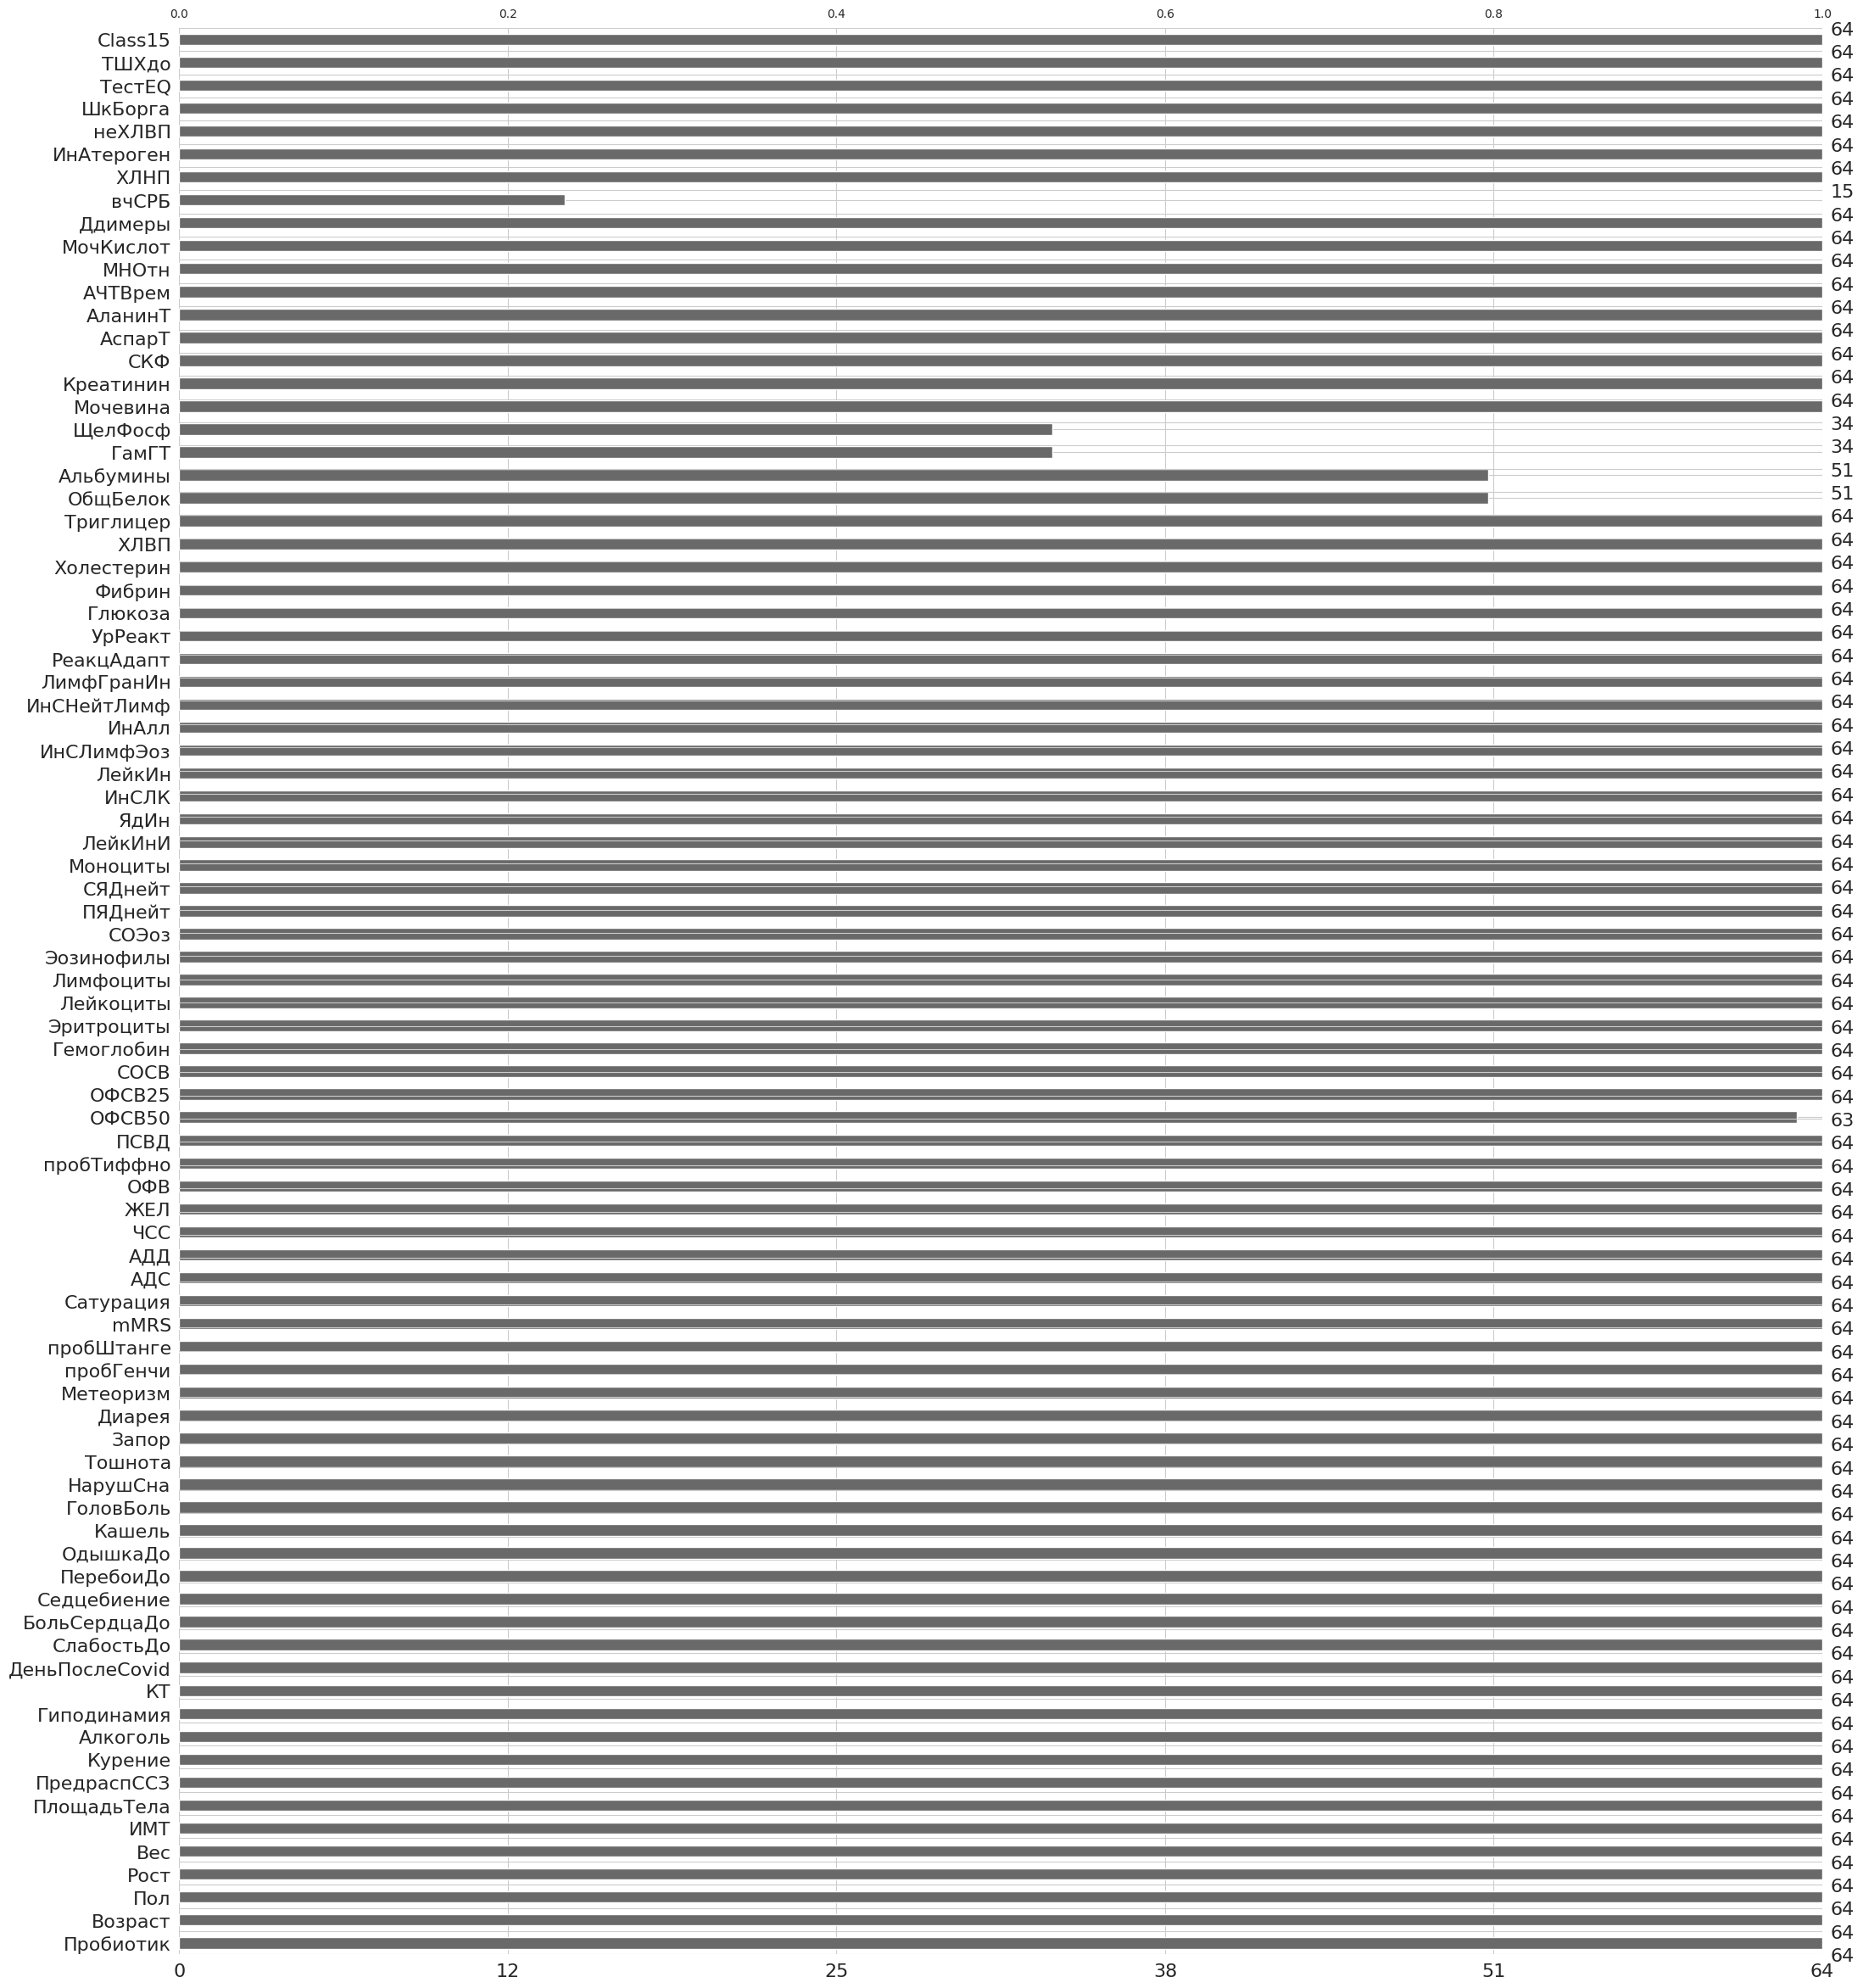

In [ ]:
msno.bar(training_data_outliner);

Матрица пропусков, вызываемая функцией matrix, показывает распределение пропусков по экземплярам.

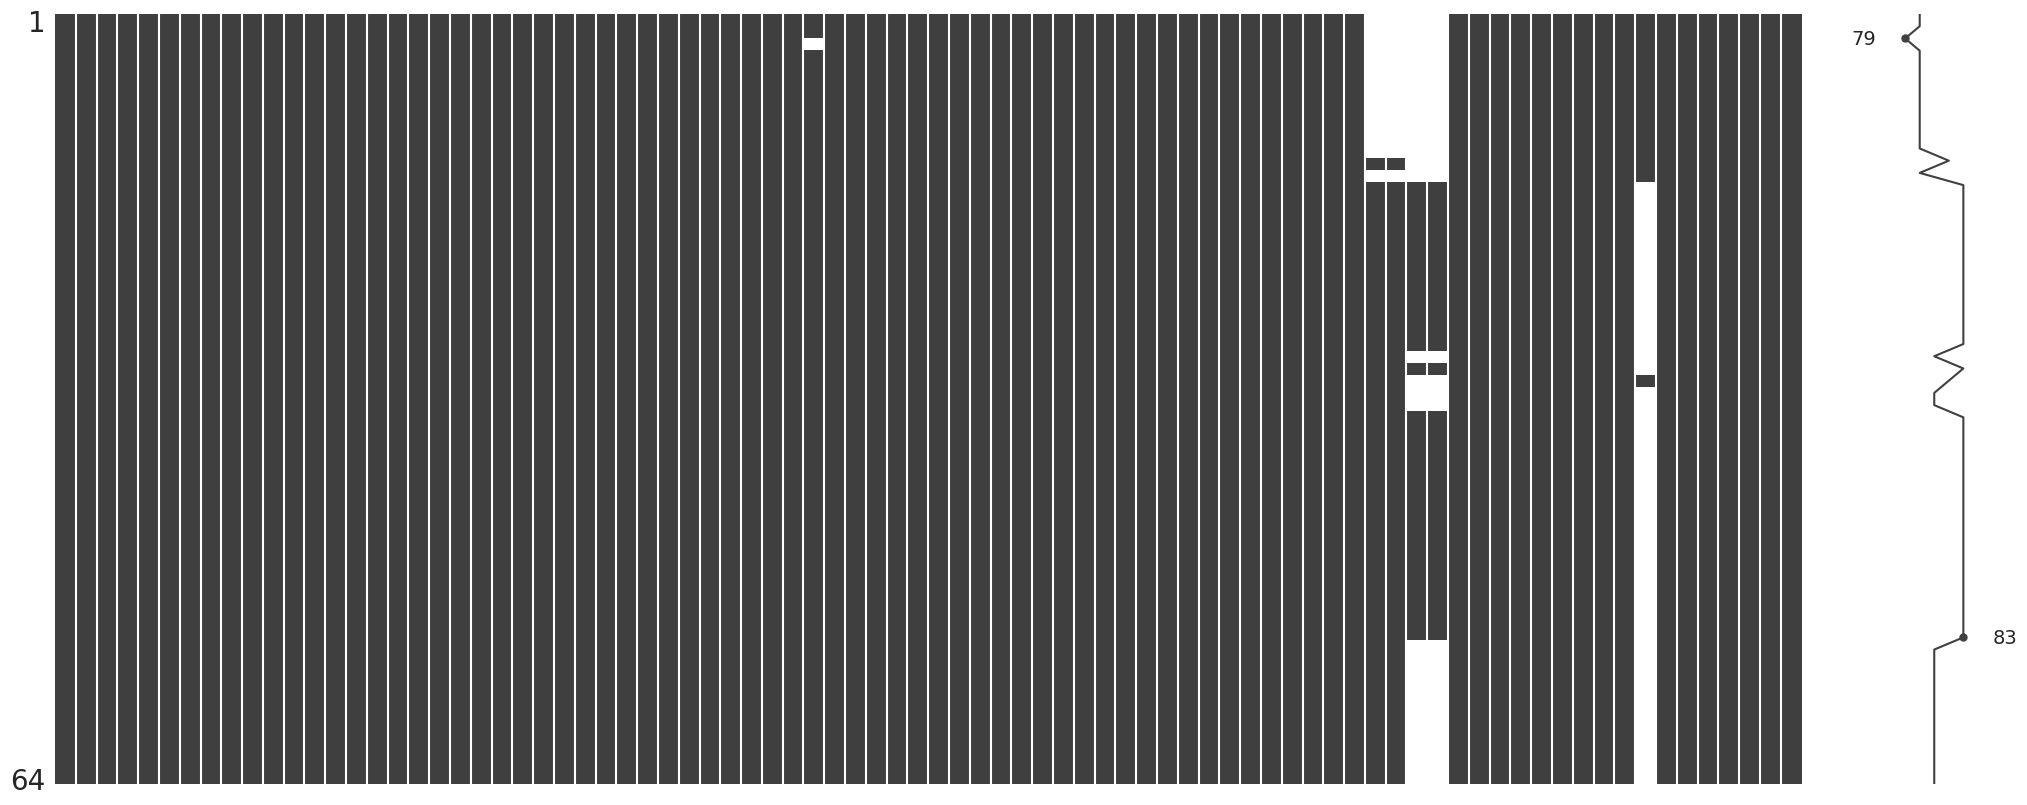

In [ ]:
msno.matrix(training_data_outliner);

Из анализа пропусков следует, что 6 признаков заполнены не полностью


*   вчСРБ (15 из 64)
*   ЩелФосф (34 из 64)
*   ГамГТ (34 из 64)
*   Альбумины (51 из 64)
*   ОбщБелок (51 из 64)
*   ОФСВ50 (63 из 64)

Так как признак "вчСРБ" заполнен лишь на 23,4% и содержит непригодные для обучения данные, его можно удалить.



In [ ]:
training_data_missing_fix = training_data_outliner.drop('вчСРБ', axis=1)
training_data_missing_fix

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо,Class15
0,0,54,2,151,58,25.437481,1.559736,0,0,0,1,2,30,2,0,0,0,2,0,1,2,0,0,0,0,35,35,2,96,145,90,65,110,107,97,70,20.0,20,19,145,4.5,9.40,32,5,27,0,53.0,10.0,0.641304,1.880000,0.455645,0.693005,1.134021,46.444954,0.211111,9.354839,2,0,4.25,5.35,4.70,0.80,0.88,NaN,NaN,NaN,NaN,3.92,125.0,42.0,41.0,20.0,37.6,0.87,330,120,3.500000,4.875000,3.90,2,11,300,1
1,0,63,2,165,115,42.240588,2.295830,1,0,0,1,1,60,2,0,0,0,2,0,1,2,0,0,0,0,25,27,2,97,130,80,67,100,108,79,87,50.0,37,29,134,5.0,3.90,35,3,27,0,54.6,7.4,0.464072,1.300000,0.849057,0.783176,1.265823,47.987421,0.362500,6.806283,2,1,6.50,4.46,6.60,1.20,1.69,NaN,NaN,NaN,NaN,3.80,46.0,102.0,28.0,39.0,27.0,0.98,240,85,4.631818,4.500000,5.40,2,13,280,1
2,0,50,2,159,46,18.195483,1.425365,0,0,0,1,1,15,2,0,2,2,2,0,1,2,0,0,0,0,20,35,2,98,127,80,64,78,69,84,89,NaN,41,17,124,4.5,8.79,20,1,18,5,70.0,4.0,0.436782,13.790000,0.240196,0.519617,0.928571,29.806088,0.212500,6.546392,2,0,6.53,3.40,5.48,0.75,3.32,NaN,NaN,NaN,NaN,2.20,90.0,69.0,24.0,13.0,36.0,1.01,248,100,3.220909,6.306667,4.73,2,12,300,1
3,0,41,2,166,92,33.386558,2.059666,1,0,0,1,2,60,2,0,2,1,2,0,1,2,0,0,0,0,25,40,2,96,135,80,60,115,120,75,87,64.0,75,78,133,4.5,12.00,18,2,5,4,70.0,6.0,0.108491,8.000000,1.081250,0.827586,1.533333,38.500000,0.975000,6.081081,3,1,6.30,5.00,3.64,0.99,1.13,NaN,NaN,NaN,NaN,5.50,102.0,61.0,25.0,188.0,30.0,0.90,220,125,2.136364,2.676768,2.65,2,12,300,1
4,0,37,2,161,71,27.390919,1.781931,1,0,0,1,2,30,2,1,1,2,2,0,1,1,0,0,0,0,24,37,2,96,105,70,65,105,100,89,79,38.0,40,39,145,5.3,9.60,31,1,12,3,56.0,9.0,0.323308,12.600000,0.735644,0.646831,1.179775,38.926002,0.557143,5.706522,3,1,4.30,3.60,4.70,1.00,1.69,NaN,NaN,NaN,NaN,2.70,85.0,64.0,128.0,50.0,34.0,0.96,340,177,2.931818,3.700000,3.70,2,13,300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,62,2,165,85,31.221304,1.973787,1,0,0,1,2,30,2,1,1,1,2,0,1,1,0,0,0,1,15,20,2,98,145,90,78,104,111,116,81,129.0,91,135,130,4.8,8.80,40,3,9,3,46.0,8.0,0.158065,3.933333,1.390400,0.799712,0.896552,42.889469,1.500000,5.800000,1,0,8.10,4.90,5.73,1.87,2.14,66.4,43.0,NaN,NaN,5.31,86.0,63.0,35.0,55.0,36.0,1.00,370,0,4.150000,2.064171,3.86,3,15,360,1
60,1,59,2,167,102,36.573559,2.175239,1,0,0,0,2,60,2,1,1,1,2,0,2,2,0,0,0,1,14,23,2,97,152,87,78,101,93,101,94,66.0,99,57,138,4.6,9.30,52,1,24,2,35.0,10.0,0.481013,11.300000,0.980800,0.631365,1.000000,33.585059,0.655172,5.608856,0,1,5.74,4.50,5.51,1.93,0.67,68.7,40.0,NaN,NaN,4.44,99.5,54.0,20.0,23.0,38.0,1.28,354,0,3.450000,1.854922,3.58,3,15,400,0
61,1,58,1,168,91,32.242063,2.060744,0,0,0,0,2,30,2,1,1,1,2,1,1,1,0,0,0,1,15,28,2,98,138,80,89,85,100,115,111,65.0,116,114,158,5.0,4.70,35,3,3,4,49.0,9.0,0.166667,2.900000,0.889831,0.614628,0.739130,35.877287,1.425000,4.367089,1,0,6.10,2.80,5.27,1.59,1.20,66.0,41.0,NaN,NaN,5.77,115.0,59.7,16.0,19.0,36.0,1.25,399,0,3.760000,2.314465,3.68,3,15,400,1
62,1,60,2,156,52,21.367521,1.501111,0,0,0,0,2,20,2,1,1,1,2,1,0,2,0,0,0,0,12,23,2,99,135,90,78,116,118,110,87,112.0,96,103,132,4.3,3.10,30,2,8,5,51.0,12.0,0.142857,4.050000,1.239831,0.873427,1.054545,45.313717,1.14

Данные в остальных столбцах являются ценными наборами для обучения, поэтому пропуски в них можно заполнить средним арифметическим/медианой. Для выбора более точного метода используем классификатор точности. Также для заполнения пропусков с большей корректностью данные будут сгруппированы.

**Заполнение средним арифметическим**

Сгруппируем данные по значениям класса.

In [ ]:
training_data_no_miss = training_data_missing_fix.copy(deep=True)
training_data_no_miss = training_data_no_miss.fillna(training_data_no_miss.mean())

Построим гистограмму по признаку ГамГТ, так как в нём примерно половина пропусков.

<Axes: xlabel='ГамГТ', ylabel='Count'>

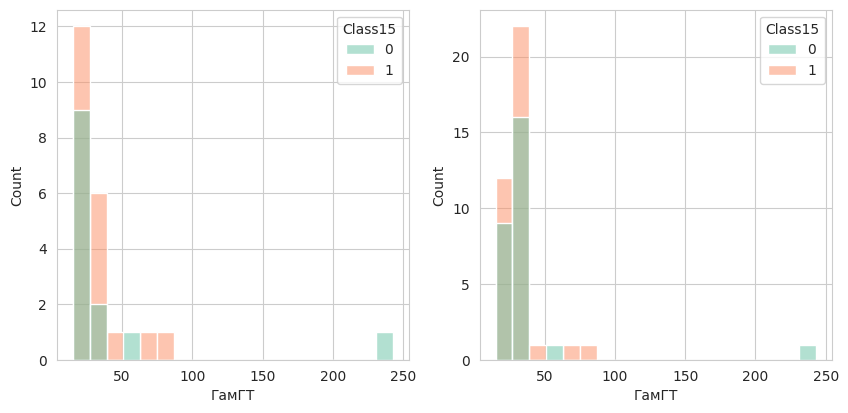

In [ ]:
figure = plt.figure(figsize=(10,10))
ax_1 = figure.add_subplot(2,2,1)
sns.histplot(data=training_data_missing_fix, x='ГамГТ', binwidth=12, hue="Class15", palette='Set2')
ax_2 = figure.add_subplot(2,2,2)
sns.histplot(data=training_data_no_miss, x='ГамГТ', binwidth=12, hue="Class15", palette='Set2')

Теперь на гистограмме признака ГамГТ можно обнаружить два пика разного цвета. Проверим точность этого метода заполнения пропусков с помощью классификатора.

In [ ]:
training_data_no_miss_y = training_data_no_miss['Class15']   
training_data_no_miss_X = training_data_no_miss.drop('Class15', 1)   
scoring = {'accuracy': make_scorer(accuracy_score)}  
mlp = MLPClassifier(solver='lbfgs', random_state=0)    
result = cross_validate(estimator=mlp.fit(training_data_no_miss_X, training_data_no_miss_y),
                            X=training_data_no_miss_X, y=training_data_no_miss_y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

Точность классификатора = 61.03%


In [ ]:
training_data_no_miss


,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо,Class15
0,0,54,2,151,58,25.437481,1.559736,0,0,0,1,2,30,2,0,0,0,2,0,1,2,0,0,0,0,35,35,2,96,145,90,65,110,107,97,70,20.000000,20,19,145,4.5,9.40,32,5,27,0,53.0,10.0,0.641304,1.880000,0.455645,0.693005,1.134021,46.444954,0.211111,9.354839,2,0,4.25,5.35,4.70,0.80,0.88,67.394118,41.431373,34.45,73.088235,3.92,125.0,42.0,41.0,20.0,37.6,0.87,330,120,3.500000,4.875000,3.90,2,11,300,1
1,0,63,2,165,115,42.240588,2.295830,1,0,0,1,1,60,2,0,0,0,2,0,1,2,0,0,0,0,25,27,2,97,130,80,67,100,108,79,87,50.000000,37,29,134,5.0,3.90,35,3,27,0,54.6,7.4,0.464072,1.300000,0.849057,0.783176,1.265823,47.987421,0.362500,6.806283,2,1,6.50,4.46,6.60,1.20,1.69,67.394118,41.431373,34.45,73.088235,3.80,46.0,102.0,28.0,39.0,27.0,0.98,240,85,4.631818,4.500000,5.40,2,13,280,1
2,0,50,2,159,46,18.195483,1.425365,0,0,0,1,1,15,2,0,2,2,2,0,1,2,0,0,0,0,20,35,2,98,127,80,64,78,69,84,89,74.888889,41,17,124,4.5,8.79,20,1,18,5,70.0,4.0,0.436782,13.790000,0.240196,0.519617,0.928571,29.806088,0.212500,6.546392,2,0,6.53,3.40,5.48,0.75,3.32,67.394118,41.431373,34.45,73.088235,2.20,90.0,69.0,24.0,13.0,36.0,1.01,248,100,3.220909,6.306667,4.73,2,12,300,1
3,0,41,2,166,92,33.386558,2.059666,1,0,0,1,2,60,2,0,2,1,2,0,1,2,0,0,0,0,25,40,2,96,135,80,60,115,120,75,87,64.000000,75,78,133,4.5,12.00,18,2,5,4,70.0,6.0,0.108491,8.000000,1.081250,0.827586,1.533333,38.500000,0.975000,6.081081,3,1,6.30,5.00,3.64,0.99,1.13,67.394118,41.431373,34.45,73.088235,5.50,102.0,61.0,25.0,188.0,30.0,0.90,220,125,2.136364,2.676768,2.65,2,12,300,1
4,0,37,2,161,71,27.390919,1.781931,1,0,0,1,2,30,2,1,1,2,2,0,1,1,0,0,0,0,24,37,2,96,105,70,65,105,100,89,79,38.000000,40,39,145,5.3,9.60,31,1,12,3,56.0,9.0,0.323308,12.600000,0.735644,0.646831,1.179775,38.926002,0.557143,5.706522,3,1,4.30,3.60,4.70,1.00,1.69,67.394118,41.431373,34.45,73.088235,2.70,85.0,64.0,128.0,50.0,34.0,0.96,340,177,2.931818,3.700000,3.70,2,13,300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,62,2,165,85,31.221304,1.973787,1,0,0,1,2,30,2,1,1,1,2,0,1,1,0,0,0,1,15,20,2,98,145,90,78,104,111,116,81,129.000000,91,135,130,4.8,8.80,40,3,9,3,46.0,8.0,0.158065,3.933333,1.390400,0.799712,0.896552,42.889469,1.500000,5.800000,1,0,8.10,4.90,5.73,1.87,2.14,66.400000,43.000000,34.45,73.088235,5.31,86.0,63.0,35.0,55.0,36.0,1.00,370,0,4.150000,2.064171,3.86,3,15,360,1
60,1,59,2,167,102,36.573559,2.175239,1,0,0,0,2,60,2,1,1,1,2,0,2,2,0,0,0,1,14,23,2,97,152,87,78,101,93,101,94,66.000000,99,57,138,4.6,9.30,52,1,24,2,35.0,10.0,0.481013,11.300000,0.980800,0.631365,1.000000,33.585059,0.655172,5.608856,0,1,5.74,4.50,5.51,1.93,0.67,68.700000,40.000000,34.45,73.088235,4.44,99.5,54.0,20.0,23.0,38.0,1.28,354,0,3.450000,1.854922,3.58,3,15,400,0
61,1,58,1,168,91,32.242063,2.060744,0,0,0,0,2,30,2,1,1,1,2,1,1,1,0,0,0,1,15,28,2,98,138,80,89,85,100,115,111,65.000000,116,114,158,5.0,4.70,35,3,3,4,49.0,9.0,0.166667,2.900000,0.889831,0.614628,0.739130,35.877287,1.425000,4.367089,1,0,6.10,2.80,5.27,1.59,1.20,66.000000,41.000000,34.45,73.088235,5.77,115.0,59.7,16.0,19.0,36.0,1.25,399,0,3.760000,2.314465,3.68,3,15,400,1
62,1,60,2,156,52,2

**Заполнение медианой**

In [ ]:
# training_data_no_miss = training_data_missing_fix.copy(deep=True)
# training_data_no_miss = training_data_no_miss.fillna(training_data_no_miss.median())

<Axes: xlabel='ГамГТ', ylabel='Count'>

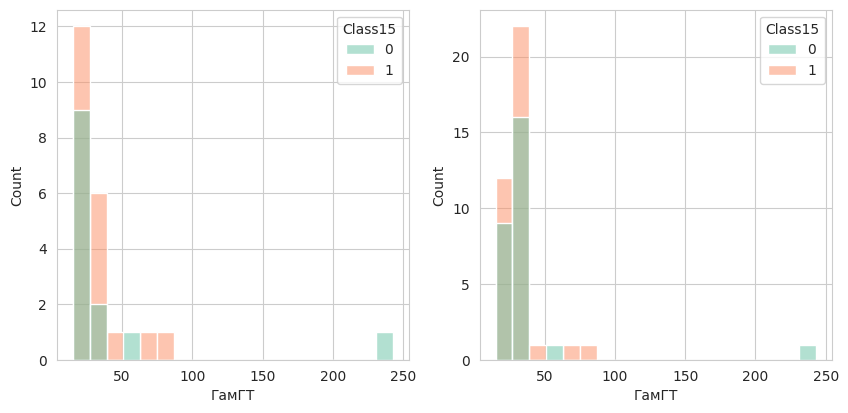

In [ ]:
figure = plt.figure(figsize=(10,10))
ax_1 = figure.add_subplot(2,2,1)
sns.histplot(data=training_data_missing_fix, x='ГамГТ', binwidth=12, hue="Class15", palette='Set2')
ax_2 = figure.add_subplot(2,2,2)
sns.histplot(data=training_data_no_miss, x='ГамГТ', binwidth=12, hue="Class15", palette='Set2')

In [ ]:
training_data_no_miss_y = training_data_no_miss['Class15']   
training_data_no_miss_X = training_data_no_miss.drop('Class15', 1)   
scoring = {'accuracy': make_scorer(accuracy_score)}  
mlp = MLPClassifier(solver='lbfgs', random_state=0)    
result = cross_validate(estimator=mlp.fit(training_data_no_miss_X, training_data_no_miss_y),
                            X=training_data_no_miss_X, y=training_data_no_miss_y,
                            scoring=scoring, cv=StratifiedKFold(5), n_jobs=-1,
                            return_train_score=False)
print('Точность классификатора = {}%'.format(round(100 * np.mean(result['test_accuracy']), 2)))

Точность классификатора = 61.03%


# Разделение входных данных и выходной переменных

Передача частей данных в отдельные переменные

Необходимо спрогнозировать эффективность выздоровление пациента, поэтому выходная переменная - это Class15. Запишем название столбца таблицы, в котором содержится целевая функция, в переменную target_variable:

In [ ]:
target_variable = 'Class15'

Теперь выделим в отдельную переменную training_target_variable весь столбец со значениями целевой переменной и проверим корректность присвоенных данных.

In [ ]:
training_target_variable = training_data_no_miss[target_variable]
training_target_variable.info()

<class 'pandas.core.series.Series'>
RangeIndex: 64 entries, 0 to 63
Series name: Class15
Non-Null Count  Dtype
--------------  -----
64 non-null     int64
dtypes: int64(1)
memory usage: 640.0 bytes


В отдельную переменную training_samples запишем признаки - то есть всю обучающую таблицу, за исключением целевой переменной. Для этого вызовем у переменной training_data метод drop() и удалим столбец "Class15".

In [ ]:
training_samples = training_data_no_miss.drop(target_variable, axis=1)

Проверим, что столбец действительно удалён с помощью методов *head* и *shape*.

In [ ]:
training_samples.head()

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо
0,0,54,2,151,58,25.437481,1.559736,0,0,0,1,2,30,2,0,0,0,2,0,1,2,0,0,0,0,35,35,2,96,145,90,65,110,107,97,70,20.000000,20,19,145,4.5,9.40,32,5,27,0,53.0,10.0,0.641304,1.88,0.455645,0.693005,1.134021,46.444954,0.211111,9.354839,2,0,4.25,5.35,4.70,0.80,0.88,67.394118,41.431373,34.45,73.088235,3.92,125.0,42.0,41.0,20.0,37.6,0.87,330,120,3.500000,4.875000,3.90,2,11,300
1,0,63,2,165,115,42.240588,2.295830,1,0,0,1,1,60,2,0,0,0,2,0,1,2,0,0,0,0,25,27,2,97,130,80,67,100,108,79,87,50.000000,37,29,134,5.0,3.90,35,3,27,0,54.6,7.4,0.464072,1.30,0.849057,0.783176,1.265823,47.987421,0.362500,6.806283,2,1,6.50,4.46,6.60,1.20,1.69,67.394118,41.431373,34.45,73.088235,3.80,46.0,102.0,28.0,39.0,27.0,0.98,240,85,4.631818,4.500000,5.40,2,13,280
2,0,50,2,159,46,18.195483,1.425365,0,0,0,1,1,15,2,0,2,2,2,0,1,2,0,0,0,0,20,35,2,98,127,80,64,78,69,84,89,74.888889,41,17,124,4.5,8.79,20,1,18,5,70.0,4.0,0.436782,13.79,0.240196,0.519617,0.928571,29.806088,0.212500,6.546392,2,0,6.53,3.40,5.48,0.75,3.32,67.394118,41.431373,34.45,73.088235,2.20,90.0,69.0,24.0,13.0,36.0,1.01,248,100,3.220909,6.306667,4.73,2,12,300
3,0,41,2,166,92,33.386558,2.059666,1,0,0,1,2,60,2,0,2,1,2,0,1,2,0,0,0,0,25,40,2,96,135,80,60,115,120,75,87,64.000000,75,78,133,4.5,12.00,18,2,5,4,70.0,6.0,0.108491,8.00,1.081250,0.827586,1.533333,38.500000,0.975000,6.081081,3,1,6.30,5.00,3.64,0.99,1.13,67.394118,41.431373,34.45,73.088235,5.50,102.0,61.0,25.0,188.0,30.0,0.90,220,125,2.136364,2.676768,2.65,2,12,300
4,0,37,2,161,71,27.390919,1.781931,1,0,0,1,2,30,2,1,1,2,2,0,1,1,0,0,0,0,24,37,2,96,105,70,65,105,100,89,79,38.000000,40,39,145,5.3,9.60,31,1,12,3,56.0,9.0,0.323308,12.60,0.735644,0.646831,1.179775,38.926002,0.557143,5.706522,3,1,4.30,3.60,4.70,1.00,1.69,67.394118,41.431373,34.45,73.088235,2.70,85.0,64.0,128.0,50.0,34.0,0.96,340,177,2.931818,3.700000,3.70,2,13,300


In [ ]:
training_samples.shape

(64, 82)

# Инициализация решающего алгоритма

Лес решающих деревьев - ансамбль из множества решающих деревьев. Решающее дерево - это алгоритм, иерархически раскладывающий данные на множество бинарных условий. 

Для создания модели случайного леса вызываем модуль ensemble, затем через точку указываем название алгоритма RandomForestRegressor.

In [ ]:
random_forest_model = ensemble.RandomForestRegressor()
random_forest_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Вызываем метод fit() у модели и передаем ему на вход два аргумента: таблицу входных признаков и столбец значений целевой переменной - (training_samples, training_target_variable)

In [ ]:
random_forest_model.fit(training_samples, training_target_variable)

RandomForestRegressor()

# Тестовые данные

Обработка данных для тестирования

Кодируем тестовые данные

In [ ]:
test_data_encoding = test_data.copy (deep=True)
coding = preprocessing.LabelEncoder() 
test_data_encoding['РеакцАдапт']= coding.fit_transform(test_data_encoding['РеакцАдапт'])
test_data_encoding['УрРеакт']= coding.fit_transform(test_data_encoding['УрРеакт'])
test_data_encoding['Ддимеры'].values[39] = test_data['Ддимеры'].values[39]/10

Обработка пропусков

In [ ]:
test_data_no_miss = test_data_encoding.copy (deep=True)
test_data_no_miss = test_data_no_miss.drop('вчСРБ', axis=1)
test_data_no_miss = test_data_no_miss.fillna(test_data_no_miss.mean())
test_data_no_miss

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо,ТШХпосле
0,0,54,2,151,58,25.437481,1.559736,0,0,0,1,2,30,2,0,0,0,2,0,1,2,0,0,0,0,35,35,2,96,145,90,65,110,107,97,70,20.000000,20,19,145,4.5,9.40,32,5,27,0,53.0,10.0,0.641304,1.880000,0.455645,0.693005,1.134021,46.444954,0.211111,9.354839,2,0,4.25,5.35,4.70,0.80,0.88,67.394118,41.431373,34.45,73.088235,3.92,125.0,42.0,41.0,20.0,37.6,0.87,330,120,3.500000,4.875000,3.90,2,11,300,410
1,0,63,2,165,115,42.240588,2.295830,1,0,0,1,1,60,2,0,0,0,2,0,1,2,0,0,0,0,25,27,2,97,130,80,67,100,108,79,87,50.000000,37,29,134,5.0,3.90,35,3,27,0,54.6,7.4,0.464072,1.300000,0.849057,0.783176,1.265823,47.987421,0.362500,6.806283,2,1,6.50,4.46,6.60,1.20,1.69,67.394118,41.431373,34.45,73.088235,3.80,46.0,102.0,28.0,39.0,27.0,0.98,240,85,4.631818,4.500000,5.40,2,13,280,376
2,0,50,2,159,46,18.195483,1.425365,0,0,0,1,1,15,2,0,2,2,2,0,1,2,0,0,0,0,20,35,2,98,127,80,64,78,69,84,89,74.888889,41,17,124,4.5,8.79,20,1,18,5,70.0,4.0,0.436782,13.790000,0.240196,0.519617,0.928571,29.806088,0.212500,6.546392,2,0,6.53,3.40,5.48,0.75,3.32,67.394118,41.431373,34.45,73.088235,2.20,90.0,69.0,24.0,13.0,36.0,1.01,248,100,3.220909,6.306667,4.73,2,12,300,350
3,0,41,2,166,92,33.386558,2.059666,1,0,0,1,2,60,2,0,2,1,2,0,1,2,0,0,0,0,25,40,2,96,135,80,60,115,120,75,87,64.000000,75,78,133,4.5,12.00,18,2,5,4,70.0,6.0,0.108491,8.000000,1.081250,0.827586,1.533333,38.500000,0.975000,6.081081,3,1,6.30,5.00,3.64,0.99,1.13,67.394118,41.431373,34.45,73.088235,5.50,102.0,61.0,25.0,188.0,30.0,0.90,220,125,2.136364,2.676768,2.65,2,12,300,400
4,0,37,2,161,71,27.390919,1.781931,1,0,0,1,2,30,2,1,1,2,2,0,1,1,0,0,0,0,24,37,2,96,105,70,65,105,100,89,79,38.000000,40,39,145,5.3,9.60,31,1,12,3,56.0,9.0,0.323308,12.600000,0.735644,0.646831,1.179775,38.926002,0.557143,5.706522,3,1,4.30,3.60,4.70,1.00,1.69,67.394118,41.431373,34.45,73.088235,2.70,85.0,64.0,128.0,50.0,34.0,0.96,340,177,2.931818,3.700000,3.70,2,13,300,400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,62,2,165,85,31.221304,1.973787,1,0,0,1,2,30,2,1,1,1,2,0,1,1,0,0,0,1,15,20,2,98,145,90,78,104,111,116,81,129.000000,91,135,130,4.8,8.80,40,3,9,3,46.0,8.0,0.158065,3.933333,1.390400,0.799712,0.896552,42.889469,1.500000,5.800000,1,0,8.10,4.90,5.73,1.87,2.14,66.400000,43.000000,34.45,73.088235,5.31,86.0,63.0,35.0,55.0,36.0,1.00,370,0,4.150000,2.064171,3.86,3,15,360,420
60,1,59,2,167,102,36.573559,2.175239,1,0,0,0,2,60,2,1,1,1,2,0,2,2,0,0,0,1,14,23,2,97,152,87,78,101,93,101,94,66.000000,99,57,138,4.6,9.30,52,1,24,2,35.0,10.0,0.481013,11.300000,0.980800,0.631365,1.000000,33.585059,0.655172,5.608856,0,1,5.74,4.50,5.51,1.93,0.67,68.700000,40.000000,34.45,73.088235,4.44,99.5,54.0,20.0,23.0,38.0,1.28,354,0,3.450000,1.854922,3.58,3,15,400,450
61,1,58,1,168,91,32.242063,2.060744,0,0,0,0,2,30,2,1,1,1,2,1,1,1,0,0,0,1,15,28,2,98,138,80,89,85,100,115,111,65.000000,116,114,158,5.0,4.70,35,3,3,4,49.0,9.0,0.166667,2.900000,0.889831,0.614628,0.739130,35.877287,1.425000,4.367089,1,0,6.10,2.80,5.27,1.59,1.20,66.000000,41.000000,34.45,73.088235,5.77,115.0,59.7,16.0,19.0,36.0,1.25,399,0,3.760000,2.314465,3.68,3,15,400,500
6

Разделение переменных

In [ ]:
target_variable = 'ТШХпосле'
test_target_variable = test_data_no_miss[target_variable]
test_samples = test_data_no_miss.drop(target_variable, axis=1)

Проверка данных

In [ ]:
test_samples

,Пробиотик,Возраст,Пол,Рост,Вес,ИМТ,ПлощадьТела,ПредраспССЗ,Курение,Алкоголь,Гиподинамия,КТ,ДеньПослеCovid,СлабостьДо,БольСердцаДо,Седцебиение,ПеребоиДо,ОдышкаДо,Кашель,ГоловБоль,НарушСна,Тошнота,Запор,Диарея,Метеоризм,пробГенчи,пробШтанге,mMRS,Сатурация,АДС,АДД,ЧСС,ЖЕЛ,ОФВ,пробТиффно,ПСВД,ОФСВ50,ОФСВ25,СОСВ,Гемоглобин,Эритроциты,Лейкоциты,Лимфоциты,Эозинофилы,СОЭоз,ПЯДнейт,СЯДнейт,Моноциты,ЛейкИнИ,ЯдИн,ИнСЛК,ЛейкИн,ИнСЛимфЭоз,ИнАлл,ИнСНейтЛимф,ЛимфГранИн,РеакцАдапт,УрРеакт,Глюкоза,Фибрин,Холестерин,ХЛВП,Триглицер,ОбщБелок,Альбумины,ГамГТ,ЩелФосф,Мочевина,Креатинин,СКФ,АспарТ,АланинТ,АЧТВрем,МНОтн,МочКислот,Ддимеры,ХЛНП,ИнАтероген,неХЛВП,ШкБорга,ТестEQ,ТШХдо
0,0,54,2,151,58,25.437481,1.559736,0,0,0,1,2,30,2,0,0,0,2,0,1,2,0,0,0,0,35,35,2,96,145,90,65,110,107,97,70,20.000000,20,19,145,4.5,9.40,32,5,27,0,53.0,10.0,0.641304,1.880000,0.455645,0.693005,1.134021,46.444954,0.211111,9.354839,2,0,4.25,5.35,4.70,0.80,0.88,67.394118,41.431373,34.45,73.088235,3.92,125.0,42.0,41.0,20.0,37.6,0.87,330,120,3.500000,4.875000,3.90,2,11,300
1,0,63,2,165,115,42.240588,2.295830,1,0,0,1,1,60,2,0,0,0,2,0,1,2,0,0,0,0,25,27,2,97,130,80,67,100,108,79,87,50.000000,37,29,134,5.0,3.90,35,3,27,0,54.6,7.4,0.464072,1.300000,0.849057,0.783176,1.265823,47.987421,0.362500,6.806283,2,1,6.50,4.46,6.60,1.20,1.69,67.394118,41.431373,34.45,73.088235,3.80,46.0,102.0,28.0,39.0,27.0,0.98,240,85,4.631818,4.500000,5.40,2,13,280
2,0,50,2,159,46,18.195483,1.425365,0,0,0,1,1,15,2,0,2,2,2,0,1,2,0,0,0,0,20,35,2,98,127,80,64,78,69,84,89,74.888889,41,17,124,4.5,8.79,20,1,18,5,70.0,4.0,0.436782,13.790000,0.240196,0.519617,0.928571,29.806088,0.212500,6.546392,2,0,6.53,3.40,5.48,0.75,3.32,67.394118,41.431373,34.45,73.088235,2.20,90.0,69.0,24.0,13.0,36.0,1.01,248,100,3.220909,6.306667,4.73,2,12,300
3,0,41,2,166,92,33.386558,2.059666,1,0,0,1,2,60,2,0,2,1,2,0,1,2,0,0,0,0,25,40,2,96,135,80,60,115,120,75,87,64.000000,75,78,133,4.5,12.00,18,2,5,4,70.0,6.0,0.108491,8.000000,1.081250,0.827586,1.533333,38.500000,0.975000,6.081081,3,1,6.30,5.00,3.64,0.99,1.13,67.394118,41.431373,34.45,73.088235,5.50,102.0,61.0,25.0,188.0,30.0,0.90,220,125,2.136364,2.676768,2.65,2,12,300
4,0,37,2,161,71,27.390919,1.781931,1,0,0,1,2,30,2,1,1,2,2,0,1,1,0,0,0,0,24,37,2,96,105,70,65,105,100,89,79,38.000000,40,39,145,5.3,9.60,31,1,12,3,56.0,9.0,0.323308,12.600000,0.735644,0.646831,1.179775,38.926002,0.557143,5.706522,3,1,4.30,3.60,4.70,1.00,1.69,67.394118,41.431373,34.45,73.088235,2.70,85.0,64.0,128.0,50.0,34.0,0.96,340,177,2.931818,3.700000,3.70,2,13,300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,62,2,165,85,31.221304,1.973787,1,0,0,1,2,30,2,1,1,1,2,0,1,1,0,0,0,1,15,20,2,98,145,90,78,104,111,116,81,129.000000,91,135,130,4.8,8.80,40,3,9,3,46.0,8.0,0.158065,3.933333,1.390400,0.799712,0.896552,42.889469,1.500000,5.800000,1,0,8.10,4.90,5.73,1.87,2.14,66.400000,43.000000,34.45,73.088235,5.31,86.0,63.0,35.0,55.0,36.0,1.00,370,0,4.150000,2.064171,3.86,3,15,360
60,1,59,2,167,102,36.573559,2.175239,1,0,0,0,2,60,2,1,1,1,2,0,2,2,0,0,0,1,14,23,2,97,152,87,78,101,93,101,94,66.000000,99,57,138,4.6,9.30,52,1,24,2,35.0,10.0,0.481013,11.300000,0.980800,0.631365,1.000000,33.585059,0.655172,5.608856,0,1,5.74,4.50,5.51,1.93,0.67,68.700000,40.000000,34.45,73.088235,4.44,99.5,54.0,20.0,23.0,38.0,1.28,354,0,3.450000,1.854922,3.58,3,15,400
61,1,58,1,168,91,32.242063,2.060744,0,0,0,0,2,30,2,1,1,1,2,1,1,1,0,0,0,1,15,28,2,98,138,80,89,85,100,115,111,65.000000,116,114,158,5.0,4.70,35,3,3,4,49.0,9.0,0.166667,2.900000,0.889831,0.614628,0.739130,35.877287,1.425000,4.367089,1,0,6.10,2.80,5.27,1.59,1.20,66.000000,41.000000,34.45,73.088235,5.77,115.0,59.7,16.0,19.0,36.0,1.25,399,0,3.760000,2.314465,3.68,3,15,400
62,1,60,2,156,52,21.367521,1.501111,0,0,0,0,2,